In [1]:
import numpy as np
import matplotlib as mpl
#mpl.use('PDF')
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
from scatter import scatter
import scipy as scipy

In [2]:
#=======================================================================
# Fix random series
#=======================================================================
np.random.seed(1234)
#=======================================================================
# Define the number of samples :
#=======================================================================
#  nscale : defines the number of simulated samples (2**nscale)
#=======================================================================
#=======================================================================
#  nstep : defines the number of scatering transform
#=======================================================================

nscale=10
nstep=6
ndata=2**(nscale)

In [3]:
#=======================================================================
# Define 1/F law for the noise :
#=======================================================================
tf=np.roll(np.arange(ndata)-(ndata/2.0),ndata//2)
tf[1::]=1/abs(tf[1::])
tf[0]=0

In [4]:
#=======================================================================
# Gaussian noise :
#=======================================================================
gauss_noise=ifft(fft(np.random.randn(ndata))*tf).real

In [5]:
#=======================================================================
# Non gaussian noise :
#=======================================================================
#=======================================================================
# 1- Sum of structure noise time constant
#=======================================================================
nogauss_noise=np.zeros([ndata])
n=1000
x=np.random.rand(n)*ndata*2-ndata/2
xx=np.arange(ndata)
for i in range(n):
    nogauss_noise+=np.exp(-abs((xx-x[i])/128.))    
nogauss_noise-=nogauss_noise.mean()

In [6]:
#=======================================================================
# 2-pop corn noise
#=======================================================================
nogauss_noise=np.zeros([ndata])
n=10
x=(np.random.rand(n)*ndata).astype('int')
dx=np.random.randn(n)
for i in range(n):
    nogauss_noise[x[i]::]+=dx[i]
nogauss_noise-=nogauss_noise.mean()
nogauss_noise*=gauss_noise.std()/nogauss_noise.std()

In [7]:
#=======================================================================
# Sum of structure noise :
#=======================================================================
scat=scatter.scatter1d(ndata,nstep)
coef1_gauss,coef2_gauss,dii=scat.compute(gauss_noise)
coef1_ngauss,coef2_ngauss,dii=scat.compute(nogauss_noise)

In [9]:
#=======================================================================
# Synthetize data :
#=======================================================================
#=    ^     :
#=   /|\    : Be aware that this synthesis process is very very long !!!
#   /_°_\   : In this example it is not yet optimise ....
#=======================================================================
%time newgauss=np.fromfile('synthetic_1D_%d_%d.dat'%(nscale,nstep),dtype='float')
#=======================================================================
#newgauss=scat.synthetize(coef1_ngauss,coef2_ngauss,newgauss)
#newgauss.tofile('synthetic_1D_%d_%d.dat'%(nscale,nstep))
#=======================================================================

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 583 µs


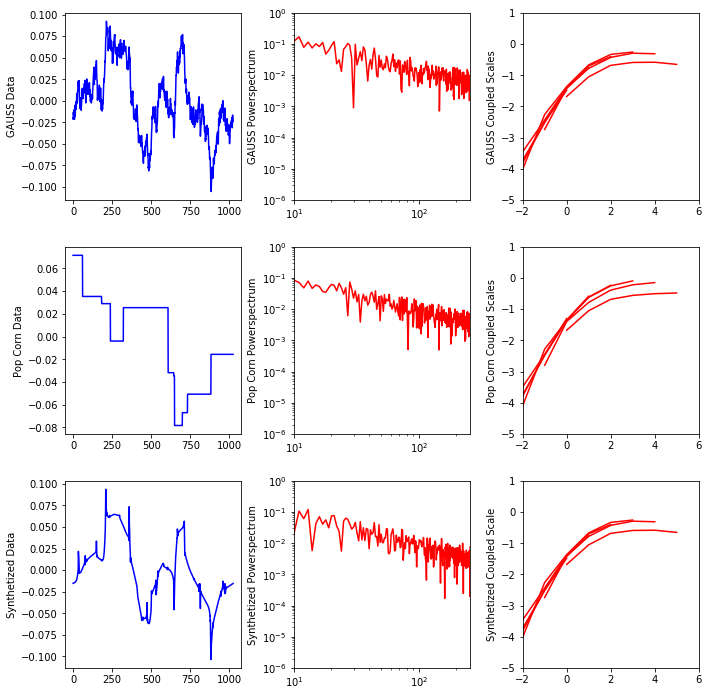

In [12]:
#=======================================================================
# Plots results :
#=======================================================================
f=plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.07, right = 0.98, top = 0.98, wspace = 0.3, hspace = 0.25)
plt.subplot(331)
plt.plot(gauss_noise,color='blue')
plt.ylabel('GAUSS Data')

plt.subplot(332)
plt.plot(abs(fft(gauss_noise))/abs(fft(gauss_noise)).max(),color='red')
plt.xlim(10,ndata/4)
plt.ylim(1E-6,1.0)
plt.ylabel('GAUSS Powerspectrum')
plt.xscale('log')
plt.yscale('log')

plt.subplot(333)
for i in range(nstep):
    plt.plot(dii[:,i],np.log(coef2_gauss[:,i])-np.log(coef1_gauss[:]),color='red')
plt.xlim(-2,nstep)
plt.ylim(-5,1)
plt.ylabel('GAUSS Coupled Scales')

plt.subplot(334)
plt.plot(nogauss_noise,color='blue')
plt.ylabel('Pop Corn Data')

plt.subplot(335)
plt.plot(abs(fft(nogauss_noise))/abs(fft(nogauss_noise)).max(),color='red')
plt.xlim(10,ndata/4)
plt.ylim(1E-6,1.0)
plt.ylabel('Pop Corn Powerspectrum')
plt.xscale('log')
plt.yscale('log')

plt.subplot(336)
for i in range(nstep):
    plt.plot(dii[:,i],np.log(coef2_ngauss[:,i])-np.log(coef1_ngauss[:]),color='red')
plt.xlim(-2,nstep)
plt.ylim(-5,1)
plt.ylabel('Pop Corn Coupled Scales')

#------------------------------------------------------------------
#-                                                -
#-                     SYNTHETIZE                 -
#-                                                -
#------------------------------------------------------------------

coef1_gauss,coef2_gauss,dii=scat.compute(newgauss)

plt.subplot(337)
plt.plot(newgauss,color='blue')
plt.ylabel('Synthetized Data')

plt.subplot(338)
plt.plot(abs(fft(newgauss))/abs(fft(newgauss)).max(),color='red')
plt.xlim(10,ndata/4)
plt.ylim(1E-6,1.0)
plt.ylabel('Synthetized Powerspectrum')
plt.xscale('log')
plt.yscale('log')

plt.subplot(339)
for i in range(nstep):
    plt.plot(dii[:,i],np.log(coef2_gauss[:,i])-np.log(coef1_gauss[:]),color='red')
plt.xlim(-2,nstep)
plt.ylim(-5,1.0)
plt.ylabel('Synthetized Coupled Scale')

plt.show()
f.savefig('demo_scatter_1D.pdf',bbox_inches='tight')